<a href="https://colab.research.google.com/github/ambreenraheem/Deep-Learning/blob/main/DL_Aug_Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ambreen Abdul Raheem (Upwork Freelancer)
### Sir Sajjid Majeed (NED Academy)
### PGD Program: Data Science with Artificial Intelligence
### Module: Deep Learning
##### Topic: "Apply data normalization and data augmentation techniques on the same Dog vs. Cat dataset."



#### 1. Data Normalization (Implicit):

The ImageDataGenerator class with rescale=1./255 performs normalization. This divides the pixel values of the images (which are typically between 0 and 255) by 255, scaling them to the range [0, 1]. This is a common preprocessing step for image data in neural networks.
#### 2. Data Augmentation:

The ImageDataGenerator class is also used for data augmentation. The following parameters enable different augmentation techniques:
rotation_range=15: Randomly rotates images by up to 15 degrees.
zoom_range=0.1: Randomly zooms in or out on images by up to 10%.
width_shift_range=0.1: Randomly shifts images horizontally by up to 10% of the width.
height_shift_range=0.1: Randomly shifts images vertically by up to 10% of the height.
horizontal_flip=True: Randomly flips images horizontally.
These augmentation techniques help to increase the size and diversity of your training dataset, making the model more robust and less prone to overfitting.

In [1]:
# Step 1: Import Libraries
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Step 2: Setup and Download Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 42.4MB/s]
100% 1.06G/1.06G [00:11<00:00, 100MB/s] 


In [3]:
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
# Step 3: Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [5]:
train_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 16000 images belonging to 2 classes.


In [6]:
val_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4000 images belonging to 2 classes.


In [7]:
# Step 4: Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
# Step 5: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Step 6: Setup Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [12]:
# Step 7: Train Model
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stop])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 301s 602ms/step - accuracy: 0.5402 - loss: 1.6115 - val_accuracy: 0.5368 - val_loss: 0.6811
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 296s 592ms/step - accuracy: 0.5894 - loss: 0.6676 - val_accuracy: 0.5773 - val_loss: 1.1999
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 298s 597ms/step - accuracy: 0.6191 - loss: 0.6541 - val_accuracy: 0.5695 - val_loss: 0.6642
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 303s 606ms/step - accuracy: 0.6276 - loss: 0.6452 - val_accuracy: 0.6355 - val_loss: 0.6292
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 304s 609ms/step - accuracy: 0.6610 - loss: 0.6192 - val_accuracy: 0.6428 - val_loss: 0.6466
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 296s 592ms/step - accuracy: 0.6652 - loss: 0.6113 - val_accuracy: 0.7000 - val_loss: 0.5812
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 324s 648ms/step - accuracy: 0.7045 - loss: 0.5728 - val_accuracy: 0.7105 - val_loss: 0.5654
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 296s 592ms/step - accuracy: 0.7091 -

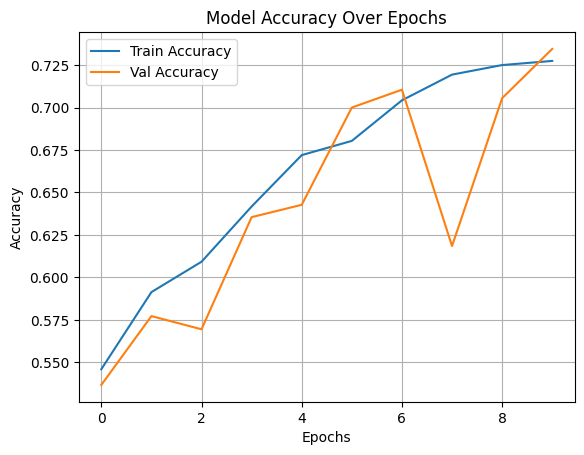

In [13]:
# Step 8: Evaluate & Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

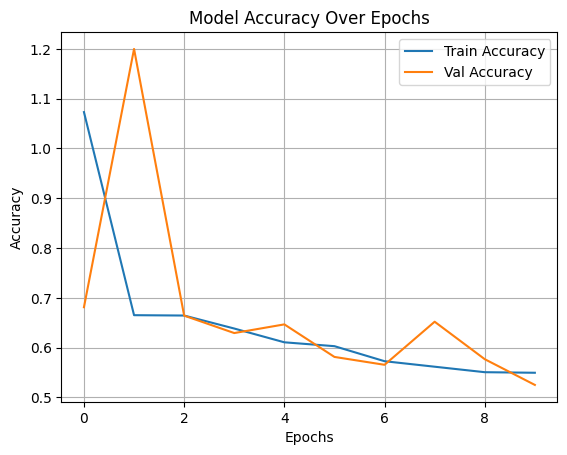

In [14]:
# Step 8: Evaluate & Plot
plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import cv2

In [17]:
test_image = cv2.imread('/content/cat.jpg')

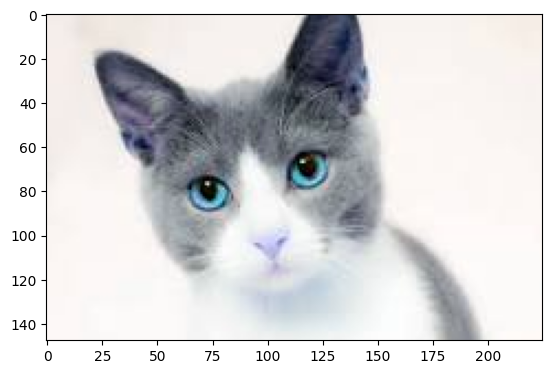

In [18]:
plt.imshow(test_image)

In [19]:
test_image.shape

(148, 225, 3)

In [20]:
test_image = cv2.resize(test_image, (256, 256))

In [21]:
test_input = test_image.reshape((1, 256, 256, 3))

In [22]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[0.2206044]], dtype=float32)

In [24]:
test_image2 = cv2.imread('/content/dog cat.jpg')

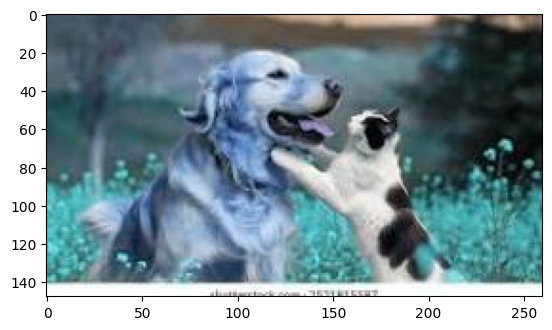

In [25]:
plt.imshow(test_image2)

In [26]:
test_image3 = cv2.resize(test_image2, (256, 256))

In [28]:
test_input3 = test_image3.reshape((1, 256, 256, 3))

In [29]:
model.predict(test_input3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.2206044]], dtype=float32)